![title](./cover.png)

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter

plt.style.use('ggplot')

# Misión
En esta práctica tendrás que resolver un problema mal condicionado utilizando la descomposición de valores singulares y tendrás que localizar de manera teórica un sismo considerando los errores en las mediciones. 
# Parte 1
En la primera parte vamos a observar como pequeños errores en las observaciones pueden causar que la inversión sea completamente inestable aún para un modelo con pocos parámetros. Considera que el problema se puede expresar de la siguiente forma,
$$
Ay=b.
$$
## Instrucciones
1. Declara la matriz **A**. De la siguiente forma,
$$
\begin{equation}
A=\begin{bmatrix}0.835 & 0.667\\ 0.333 & 0.266\end{bmatrix}
\end{equation}
$$
2. Declara dos matrices de observación **b** de la siguiente forma,
$$
\begin{equation}
b_1=\begin{bmatrix}0.168\\ 0.066\end{bmatrix},\qquad b_2=\begin{bmatrix}0.168\\ 0.067\end{bmatrix}
\end{equation}
$$
2. Calcula el valor de $y$, utilizando $b_1$ y $b_2$. 
3. Compara tus resultados.
4. Calcula el determinante de la matrix $A$.

In [17]:
A    = None
Ainv = None
b1   = None
b2   = None
y1   = None
y2   = None
Adet = None

print('y1=', y1)
print('y2=', y2)
print('|A| = ', Adet)

y1= [[-665.99999998]
 [ 833.99999998]]
y1= [[ 1.]
 [-1.]]
|A| =  -1.0000000000243153e-06


**Salida esperada**
```
y1= [[-665.99999998]
 [ 833.99999998]]
y1= [[ 1.]
 [-1.]]
|A| =  -1.0000000000243153e-06
```

# Parte 2
Ahora, intentaremos resolver el ejemplo visto en clase a través de mínimos cuadrados y utilizando la descomposición de valores singulares. 
<img style="float: center; width: 500px" src="sistema.png"/>
## Instrucciones
1. Declara tu matriz $A$ y $b$.
2. Intenta resolver el sistema la función de **numpy.linalg.inv()**.
3. Intenta resolver el sistema utilizando mínimos cuadrados (*linear least squares*) de la siguiente forma, <br>
$$
\begin{equation}
y=(A^T*A)^{-1}A^Tb.
\end{equation}
$$
4. Resuelve el sistema de ecuaciones utilizando la descomposición de valores singulares (*singular value descomposition*), siguiendo el siguiente procedimiento. 
    1. Convierte $A$ en una matriz cuadrada.
    2. Calcula las matrices $U$, $\Sigma$ y $V$.
    3. La matriz $\Sigma$ contiene los eigenvalores. Notarás que uno de estos valores es demasiado pequeño, lo que causará que uno de los elementos de la matriz $\Sigma^{-1}$ sea demasiado grande.
    4. Calcula la inversa de la matriz diagonal $\Sigma$, identifica cual de los valores tiende a infinito y forza este valor a cero. Esta variable sera tu matriz pseudo inversa, $\Sigma^\dagger$. 
    3. Calcula $y$ de la siguiente forma.
    $$
    \begin{equation}
    y = V'*\Sigma^\dagger*(U'*A'*b)
    \end{equation}
    $$
    

In [84]:
A        = None 
b        = None 
ylsq     = None 
U,S,V    = None 
Spsdo    = None 
Spsdo[None] = None
ysvd     = None 
K        = None 
print('S^1 = \n', np.diag(Spsdo))
print('Solución por mínimos cuadrados: \n', ylsq)
print('Solución por descomposición de valores singulares: \n', ysvd)
print('b=A*ylsq: \n',np.matmul(A,ylsq))
print('b=A*ysvd: \n',np.matmul(A,ysvd))
print('Número de condición k(A): ', K)

S^1 = 
 [[0.03964569 0.         0.         0.        ]
 [0.         0.13268272 0.         0.        ]
 [0.         0.         0.23586017 0.        ]
 [0.         0.         0.         0.        ]]
Solución por mínimos cuadrados: 
 [[4.5   ]
 [3.875 ]
 [0.4375]
 [1.875 ]]
Solución por descoposición de valores singulares: 
 [[ 0.29900744]
 [ 1.02853598]
 [ 1.18858561]
 [-0.83622829]]
A*ylsq: 
 [[3.8125]
 [2.3125]
 [4.625 ]]
A*ysvd: 
 [[ 2.]
 [-1.]
 [ 3.]]
Número de condición k(A):  9603950752407112.0


### **Salida esperada:**
```
S^1 = 
 [[0.03964569 0.         0.         0.        ]
 [0.         0.13268272 0.         0.        ]
 [0.         0.         0.23586017 0.        ]
 [0.         0.         0.         0.        ]]
Solución por mínimos cuadrados: 
 [[0.]
 [8.]
 [4.]
 [0.]]
Solución por descomposición de valores singulares: 
 [[ 0.29900744]
 [ 1.02853598]
 [ 1.18858561]
 [-0.83622829]]
A*ylsq: 
 [[3.8125]
 [2.3125]
 [4.625 ]]
A*ysvd: 
 [[ 2.]
 [-1.]
 [ 3.]]
Número de condición k(A):  9603950752407112.0
```



# Parte 3
## Estimación del Hipocentro


<img style="float: right; width: 420px" src="network.png"/>  
En esta sección vamos a resolver la localización de un sismo utilizando un aproximación probabilística de la Teoría de Inversión.  En este caso, no estamos interesados en una solución única, pero en un conjunto de posibles soluciones basado en las incertidumbres de las mediciones. <br><br>
En este ejercicio vamos a considerar una pequeña red ficticia y un espacio bidimensional con velocidad constante. Las observaciones $\mathbf{d}_{obs}$ = {$t_1,t_2,t_3,t_4$}, corresponden a los tiempo de arribo a las estaciones. La localización del hipocentro $X,Z$ y el tiempo de origen $T$, componen el modelo  $\mathbf{m}$ = {$X, Z, T$}.<br>

### Problema directo
Para un modelo arbitrario, podemos resolver el problema directo utilizando la siguiente ecuación,


<img style="float: right; width: 340px; padding: 10px" src="geometry.png"/>

$$
\mathbf{d} = f(\mathbf{m}).
$$
Donde la función $f$ describe el proceso físico que asocia a el modelo $\mathbf{m}$ con los tiempos de arribo teóricos $\mathbf{d}$. En este ejercicio, utilizaremos un simple modelo geométrico y asumiremos que el medio es homogéneo y que la velocidad es constante. Entonces, el tiempo de arribo teórico $T_i$ en una estación localizada en {$x_i, z_i$} para una fuente arbitraria {$X, Z, T$} está dado por la siguiente ecuación. 
$$
t_i = f_i(X,Z,T) = T + \frac{\sqrt{(X - x_i)^2 + (Z - z_i)^2}}{v}
$$
Si no tomamos en cuenta el tiempo de computo, se puede calcular todas las soluciones posibles para un espacio de parámetros dado. Sin embargo, en este caso incluiremos los errores en las observaciones como información del sistema físico.   


### Modelo a priori 

Toda la información obtenida de manera independiente a las mediciones se le conoce como información *a priori*. Para un modelo, esto se puede describir a través de una función de densidad de probabilidades (pdf) $\rho_m(X,Z,T)$. Consideraremos que $\rho_m(X,Z,T)$ es constante para todos los parámetros dentro del intervalo de interés. Debido a que los tiempos de arribo observado contienen incertidumbres, consideraremos que todas las mediciones son independientes, la incertidumbres estarán determinadas por las varianzas $\mathbf{\sigma}$ ={$\sigma_1, \sigma_2, \sigma_3,\sigma_4$}. La información de las observaciones puede ser descrita por la función densidad de probabilidades $rho_d$ incluyendo una constante de normalización $k$.
$$
\rho_d(\mathbf{d}) = 
k\exp\Big(-\frac{1}{2} \sum_{i}\big(\frac{t_i - t_i^{obs}}{\sigma_i}\big)^2\Big)
$$  





### Solución del problema inverso
Ahora, queremos combinar la información *a priori*, con la información obtenida de las observaciones y nuestro modelo directo. Las funciones de de densidad de probabilidad *a posteriori* es la solución a el problema inverso. La información final del espacio de soluciones está dado por la función de densidad de probabilidades $\sigma_m(X,Z,T)$. En nuestro problema especifico, conocemos el proceso físico exacto por lo que podemos resolver el problema directo. La única modificación a la solución del problema inverso se obtiene de la información *a priori* del modelo $\rho_m$ y los parámetros de observación $\rho_d$.<br><br>
$$
\sigma_m(X,Z,T) = k \; \rho_m(X,Z,T) \; \rho_d(t_1,t_2,t_3,t_4)\rvert_{t_i = f_i(X,Z,T)}
$$<br>
En este ejericio vamos a calcular la función de densidad de probabilidades $\sigma_m(X,Z,T)$ que nos permita encontrar el hipocentro y el tiempo de origen.
  
### Instrucciones:
    1. Ejecuta todas las celdas para familiarizarte con los resultados.
    
    2. Investiga la influencia de los parámetros del modelo (en la celda "Data y modelos"):
            * Cambia las incertidumbres de los datos. 
            * ¿cómo afectan los outliers tus resultados? (incertidumbre alta para una de las observaciones)
            * ¿qué pasa si agregas más estaciones en superficie?
            * ¿Que pasa si todas las estaciones están en un sólo lado?
            * ¿cómo puedes mejorar la incertidumbre en la profundidad?
            * ¿que consecuencia tiene cambiar los incrementos en el espacio de soluciones?
            
**Crea un archivo por separado y resuelve estas preguntas anexa tus gráficas que obtienes para cada pregunta**

In [115]:
# Data y modelos


# Define los valores de las coordenas de las estaciones            
# Edita las siguientes 2 líneas 
station_x = np.array([ 5,10,15,25])      # x(km) = [ 5,10,15,25]
station_z = np.array([ 0, 0, 0, 0])      # z(km) = [ 0, 0, 0, 0]

# Define las incertidumbres en los tiempos de arribo para cada estación
# Edita las siguiente 1 líneas 
uncertain_t = np.array([.5,.2,.4,.2]) # (s) = [.5,.2,.4,.2]

# Parámetros del sismo
source_x = 16                            #  x (km) = 16
source_z = 15                            #  z (km)= 15
origin_T = 17                            #  t (s) = 17
v_exact  =  5                            #  v (km/s) = 5

# Espacio de solución : (Límite inferior, límite superior, incremento)
# Edita las siguiente 3 líneas 
space_x = np.arange( 0, 35, 1 )          # x(km): ( 0, 35, 0.5 )
space_z = np.arange( 0, 25, 1 )          # z(km): ( 0, 25, 0.5 )
space_T = np.arange(10, 30, 0.5)         # Tiempo de origen (s): (10, 30, 0.25)
space_v = np.arange( 4,  6.5, 0.25 )     # Velocidad (km/s): (4, 6.5, 0.25)
v_mean     =  4.5
v_variance = 1

**Advertencia: La siguiente celda puede tardar en ejecutarse dependiendo de los parámetros que hayas seleccionado**

In [116]:
# Calcula los tiempos de arribo y resulve la inversión
# No modifiques esta parte
#-------------------------------------------------------


if np.array([station_x, station_z, uncertain_t]).size != station_x.size*3:
        print('ERROR: "station_x, station_z, uncertain_t" deben de tener las mismas dimensiones')
        raise NotImplementedError
print('Resolviendo la función de probabilidad para %i modelos '%(space_x.size*space_z.size*space_T.size*space_v.size))
        

# Calcula el tiempo observado (exacto)
t_obs = np.zeros(np.size(station_x))
for i in range(0,np.size(station_x)):  # para cada estación 
    t_obs[i] = origin_T + 1./v_exact * np.sqrt((station_x[i]-source_x)**2 + (station_z[i]-source_z)**2)


# Solución del problema inverso
sigM = np.ones([space_x.size, space_z.size, space_T.size, space_v.size]) # Inicialización de la pdf a posteriori 
# Ciclo sobre el espacio de soluciones
for ix,X in enumerate(space_x):
    for iz,Z in enumerate(space_z):
        for it,T in enumerate(space_T):
            for iv,v in enumerate(space_v):
                for istat in range(np.size(station_x)):   # Para cada estación
                    
                    # Resulve el problema directo
                    t_calc = T + 1/v * np.sqrt((X-station_x[istat])**2 + (Z-station_z[istat])**2)
                    
                    # Calcula la probabilidad asociada
                    sigM[ix,iz,it,iv] *= np.exp( -(t_calc-t_obs[istat])**2 / (2*uncertain_t[istat]**2))
                
                sigM[ix,iz,it,iv] *= np.exp(-(v-v_mean)**2 / (2*v_variance**2))
    

# Calcula la probabiliad a posteriori para el hipocentro en el plano x-z 

sigMxz = np.zeros([space_x.size, space_z.size])
sigMz = np.zeros([space_z.size])
sigMx = np.zeros([space_x.size])
for ix in range(space_x.size):
    sigMx[ix] = np.sum(sigM[ix, :, :, :])
    for iz in range(space_z.size):
        sigMz[iz] = np.sum(sigM[:, iz, :, :])
        sigMxz[ix,iz] = np.sum(sigM[ix, iz, :, :])
sigMx /= np.sum(sigMx)
sigMz /= np.sum(sigMz)


# Calcula la probabiliad a posteriori para el tiempo T
sigMT = np.zeros(space_T.size)
for it in range(space_T.size):
    sigMT[it] = np.sum(sigM[:, :, it, :])
sigMT /= np.sum(sigMT)

# Calcula la probabiliad a posteriori para la velocidad
sigMv = np.zeros(space_v.size)
for iv in range(space_v.size):
    sigMv[iv] = np.sum(sigM[:, :, :,iv])
sigMv /= np.sum(sigMv)        # Normalization for plotting

#  información a priori para la velocidad
prior_v = np.zeros(space_v.size)
for iv in range(space_v.size):
    prior_v[iv] = np.exp(-1. / (2*v_variance**2) * ((space_v[0]+iv*(space_v[1]-space_v[0])) - v_mean)**2)
prior_v /= np.sum(prior_v)

Resolviendo la función de probabilidad para 350000 modelos 


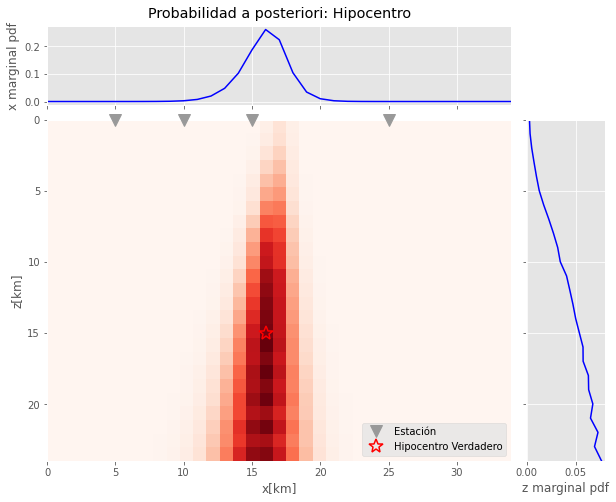

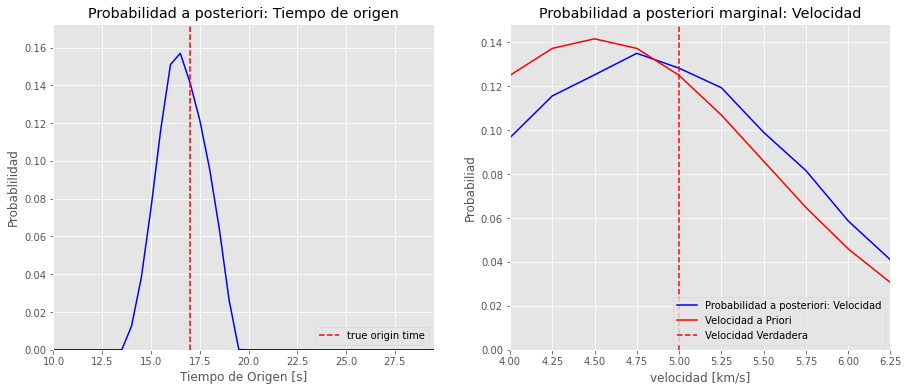

In [117]:
# Graficación del problema inverso
#----------------

# Gráfica de la probabilidad a posteriori
plt.rcParams['figure.figsize'] = 10,8
f1 = plt.subplot()
f1.plot(station_x, station_z, 'v', color='0.60', markersize=12, clip_on=False, zorder=10, label='Estación')
f1.plot(source_x, source_z,'r*', markersize=15,markerfacecolor='None',markeredgewidth=1.5,label='Hipocentro Verdadero')
f1.imshow(sigMxz.transpose(), aspect='auto',extent=[space_x[0],space_x[-1],space_z[-1],space_z[0]]
          ,cmap = 'Reds', interpolation='none')
f1.set_xlabel('x[km]')
f1.set_ylabel('z[km]')
f1.legend(loc='lower right')
f1.grid()
divider = make_axes_locatable(f1)
fx = divider.append_axes("top", 1.1, pad=0.2, sharex=f1)
fz = divider.append_axes("right", 1.1, pad=0.2, sharey=f1)
fx.set_title('Probabilidad a posteriori: Hipocentro',y=1.03)
fx.plot(space_x,sigMx,'b-',label='pdf')
fz.plot(sigMz,space_z,'b-')
fx.set_xlim(space_x[0],space_x[-1])
fz.set_ylim(space_z[-1],space_z[0])
fx.set_ylabel('x marginal pdf')
fz.set_xlabel('z marginal pdf')
for tl in fz.get_yticklabels():
    tl.set_visible(False)
for tl in fx.get_xticklabels():
    tl.set_visible(False)
plt.show()


# Probabilidad a posteriori del tiempo
plt.rcParams['figure.figsize'] = 15,6
figure = plt.figure()
f2 = figure.add_subplot(121)
f2.plot(space_T, sigMT, 'b-')
f2.plot([origin_T,origin_T],[0,sigMT.max()*1.1],'r--',label='true origin time')
f2.set_xlabel('Tiempo de Origen [s]')
f2.set_ylabel('Probablilidad')
f2.set_title('Probabilidad a posteriori: Tiempo de origen')
f2.set_xlim(space_T[0],space_T[-1])
f2.set_ylim(0,sigMT.max()*1.1)
f2.legend(loc='lower right')

# Probabilidad a posteriori de la velocidad 
f3 = figure.add_subplot(122)
f3.plot(space_v, sigMv, 'b-',label = 'Probabilidad a posteriori: Velocidad')
f3.plot(space_v, prior_v, 'r-', label='Velocidad a Priori')
f3.plot([v_exact,v_exact],[0,sigMv.max()*1.1],'r--',label='Velocidad Verdadera')
f3.set_xlabel('velocidad [km/s]')
f3.set_ylabel('Probabiliad')
f3.set_title('Probabilidad a posteriori marginal: Velocidad')
f3.set_xlim(space_v[0],space_v[-1])
f3.set_ylim(0,sigMv.max()*1.1)
f3.legend(loc='lower right')

plt.show()